<a href="https://colab.research.google.com/github/AnnaBozhenko/ML_course/blob/master/02_pyTorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.05,
                    random_state=42)

In [ ]:
dataset = pd.DataFrame({"x1": X[:, 0], "x2": X[:, 1], "y": y})

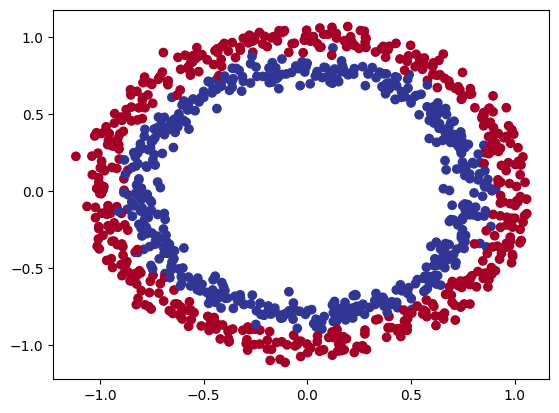

In [ ]:
plt.scatter(x=dataset.x1,
            y=dataset.x2,
            c=dataset.y,
            cmap=plt.cm.RdYlBu)

In [ ]:
# convert X, y to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Setting device to the accelerated one(GPU)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"



In [ ]:
device

'cpu'

# Implementing the NN class

In [ ]:
class CircleModel_V0(torch.nn.Module):
  def __init__(self):
    super().__init__()
    # fst variant of initialising parameters
    self.layer_1 = torch.nn.Linear(in_features=2, out_features=5)
    self.layer_2 = torch.nn.Linear(in_features=5, out_features=1)
    # snd variant of initialising parameters
    # self.layers = torch.nn.Sequential(
    #     torch.nn.Linear(in_features=2, out_features=5),
    #     torch.nn.Linear(in_features=5, out_features=1)
    # )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # according to the fst variant of initialising parameters
    return self.layer_2(self.layer_1(x))
    # according to the snd variant of initialising parameters
    # return self.layers(x)




In [ ]:
model_0_v0 = CircleModel_V0().to(device)

In [ ]:
next(model_0_v0.parameters()).device

device(type='cpu')

In [ ]:
with torch.inference_mode():
  predictions = torch.round(torch.sigmoid(model_0_v0(test_X.to(device)).squeeze()))
predictions

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])

# Set loss, optimize and evaluation of the model functions

In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss()

optimiser_nn = torch.optim.SGD(params=model_0_v0.parameters(),
                               lr=0.1)

In [ ]:
model_0_v0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.5432,  0.4002],
                      [ 0.2399,  0.3951],
                      [-0.0269, -0.3890],
                      [-0.2540,  0.0557],
                      [ 0.1282, -0.3264]])),
             ('layer_1.bias',
              tensor([-0.4673, -0.2439, -0.2729,  0.6407, -0.0423])),
             ('layer_2.weight',
              tensor([[-0.4138,  0.2198,  0.2566,  0.4060, -0.2095]])),
             ('layer_2.bias', tensor([-0.0501]))])

In [ ]:
def accuracy(actual_y, preds_y):
  correct_preds = torch.eq(preds_y, actual_y).sum().item()
  return (correct_preds/len(actual_y))*100


# Forward pass imitation

In [ ]:
y_labels = torch.round(torch.sigmoid(model_0_v0(test_X.to(device))))[:5]
y_labels

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SliceBackward0>)

In [ ]:
test_y[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
torch.eq(y_labels.squeeze(), test_y[:5].to(device).squeeze())

tensor([ True, False,  True, False,  True])

# Training data

In [ ]:
n_epochs = 100
epochs = []
train_losses = []
test_losses = []
test_accuracies = []
test_step = 10

In [ ]:
epochs_start_n = 0
epochs_end_n = epochs_start_n + n_epochs

In [ ]:
train_X, train_y = train_X.to(device), train_y.to(device)
test_X, test_y = test_X.to(device), test_y.to(device)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(epochs_start_n, epochs_end_n):
  model_0_v0.train()

  epochs.append(epoch)
  # forward pass
  y_labels = torch.round(torch.sigmoid(model_0_v0(train_X).squeeze()))

  # calculate the loss
  train_loss = loss_fn(y_labels, train_y)
  train_losses.append(train_loss)

  # evaluate accuracy
  train_acc = accuracy(train_y, y_labels)
  # print(f"epoch: {epoch}, train accuracy: {accuracy(y_labels, train_y)}%")

  # set the zero grad
  optimiser_nn.zero_grad()

  # set backward propagation
  train_loss.backward()

  # save optimized epoch parameters
  optimiser_nn.step()

  # test after every other n epoch
  if epoch % test_step == 0:
    model_0_v0.eval()
    with torch.inference_mode():
      y_test_labels = torch.round(torch.sigmoid(model_0_v0(test_X).squeeze()))
      test_loss = loss_fn(y_test_labels, test_y)
      test_losses.append(test_loss)

      test_acc = accuracy(test_y, y_test_labels)
      print(f"epoch: {epoch}, train loss: {train_loss}, train accuracy: {train_acc}%, test_loss: {test_loss}, test accuracy: {test_acc}%")
      test_accuracies.append(test_acc)

epochs_start_n = epochs_end_n
epochs_end_n += n_epochs

epoch: 0, train loss: 0.8132617473602295, train accuracy: 50.0%, test_loss: 0.8132616281509399, test accuracy: 50.0%
epoch: 10, train loss: 0.8132617473602295, train accuracy: 50.0%, test_loss: 0.8132616281509399, test accuracy: 50.0%
epoch: 20, train loss: 0.8132617473602295, train accuracy: 50.0%, test_loss: 0.8132616281509399, test accuracy: 50.0%
epoch: 30, train loss: 0.8132617473602295, train accuracy: 50.0%, test_loss: 0.8132616281509399, test accuracy: 50.0%
epoch: 40, train loss: 0.8132617473602295, train accuracy: 50.0%, test_loss: 0.8132616281509399, test accuracy: 50.0%
epoch: 50, train loss: 0.8132617473602295, train accuracy: 50.0%, test_loss: 0.8132616281509399, test accuracy: 50.0%
epoch: 60, train loss: 0.8132617473602295, train accuracy: 50.0%, test_loss: 0.8132616281509399, test accuracy: 50.0%
epoch: 70, train loss: 0.8132617473602295, train accuracy: 50.0%, test_loss: 0.8132616281509399, test accuracy: 50.0%
epoch: 80, train loss: 0.8132617473602295, train accuracy

In [ ]:
len(epochs)


100

In [ ]:
accuracy(test_y.to(device), y_test_labels)

50.0

# Importing functions to plot decision boundary




In [ ]:
from pathlib import Path
import requests

if not Path("helper_functions.py").is_file():
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



In [ ]:
from helper_functions import plot_decision_boundary, plot_predictions

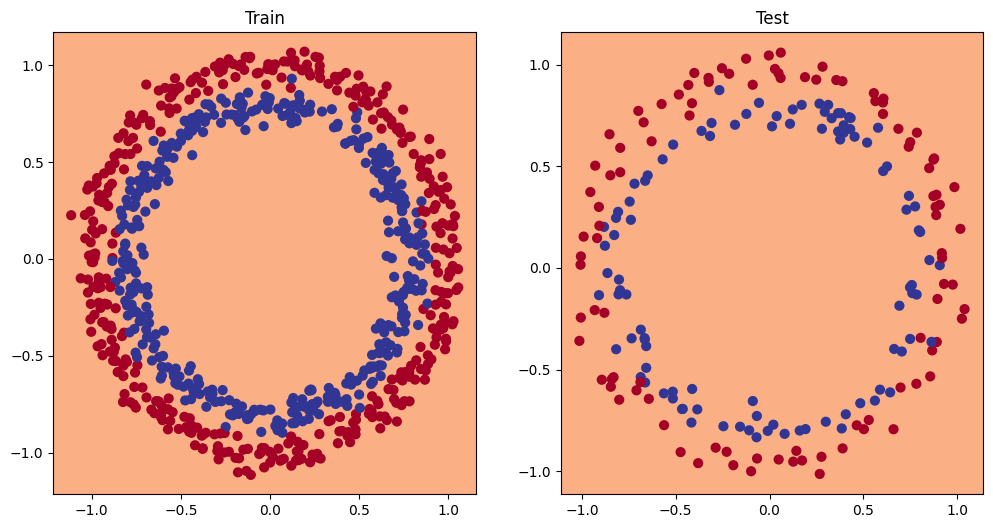

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0_v0,
                       train_X,
                       train_y)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0_v0,
                       test_X,
                       test_y)

# Implement V1 class




In [ ]:
class CircleModel_V1(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = torch.nn.Linear(in_features=2, out_features=10)
    self.layer_2 = torch.nn.Linear(in_features=10, out_features=10)
    self.layer_3 = torch.nn.Linear(in_features=10, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.layer_2(self.layer_1(x)))


In [ ]:
model_1 = CircleModel_V1().to(device)
model_1

CircleModel_V1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

# Setting loss function and optimizer for the V1 class implementation

In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss()

optimiser = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

# Training and testing

In [ ]:
epochs_n = 1000

start_epoch_n = 0
end_epoch_n = start_epoch_n + epochs_n
train_step = 100


In [ ]:
device


'cpu'

In [ ]:
train_X, train_y = train_X.to(device), train_y.to(device)
test_X, test_y = test_X.to(device), test_y.to(device)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(start_epoch_n, end_epoch_n):
  model_1.train()
  train_labels = torch.round(torch.sigmoid(model_1(train_X).squeeze()))

  train_acc = accuracy(train_labels, train_y)

  train_loss = loss_fn(train_labels,
                       train_y)

  optimiser.zero_grad()

  train_loss.backward()

  optimiser.step()

  if epoch % train_step == 0:
    model_1.eval()
    with torch.inference_mode():
      test_labels = torch.round(torch.sigmoid(model_1(test_X).squeeze()))
      test_acc = accuracy(test_labels, test_y)
      test_loss = loss_fn(test_labels,
                          test_y)

      print(f"epoch: {epoch}, train_loss: {train_loss}, train_accuracy: {train_acc}%, test_loss: {test_loss}, test_accuracy: {test_acc}%")

start_epoch_n = end_epoch_n
end_epoch_n += epochs_n


epoch: 0, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 100, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 200, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 300, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 400, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 500, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 600, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 700, train_loss: 0.7572129964828491, train_accuracy: 51.0%, test_loss: 0.7566124200820923, test_accuracy: 51.0%
epoch: 800, train_loss: 0.7572129964828491, train_

In [ ]:
from helper_functions import plot_decision_boundary

# Plot the decision boundary plot

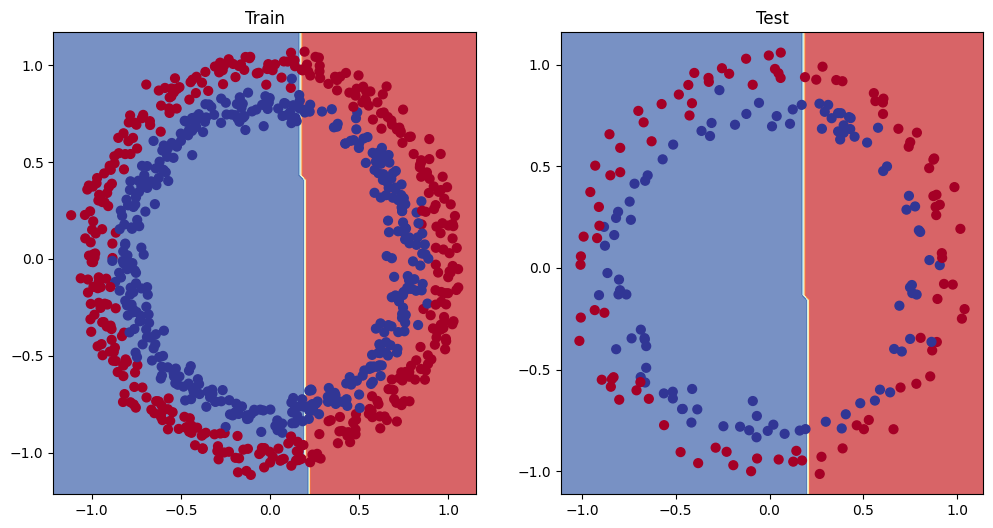

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1,
                       train_X,
                       train_y)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1,
                       test_X,
                       test_y)

# Create a new set of random data circles

In [ ]:
from sklearn.datasets import make_circles

In [154]:
samples_n = 1000
X, y = make_circles(n_samples=samples_n,
                 noise=0.03,
                 random_state=42)

In [156]:
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).to(device)

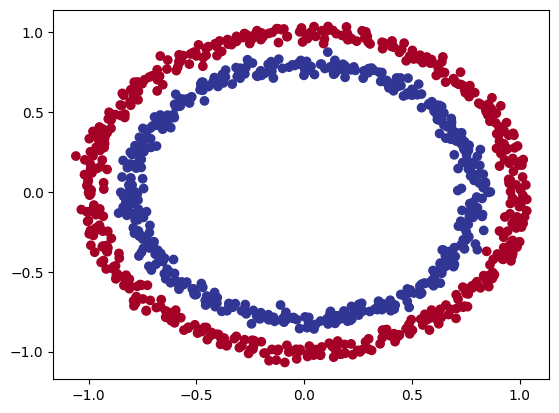

In [155]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# setting the device to the accelerated unit
device = "cuda" if torch.cuda.is_available() else "cpu"


In [157]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
device

'cpu'

# Implement v2 class to predict color of circles

In [158]:
class CircleModelV2(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = torch.nn.Linear(in_features=2, out_features=10)
    self.layer_2 = torch.nn.Linear(in_features=10, out_features=10)
    self.layer_3 = torch.nn.Linear(in_features=10, out_features=1)
    self.relu = torch.nn.ReLU()

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # layer 1(2, 10) -> activation f(1, 1) ->
    #   layer 2(10, 10) -> activation f(1, 1) ->
    #     layer 3 (10, 1) -> probabilities
    return \
                  self.layer_3(
                      self.relu(
                      self.layer_2(
                          self.relu(
                          self.layer_1(x)
                          ))
                      ))




In [159]:
model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

# Create loss and optimise functions

In [160]:
loss_fn = torch.nn.BCEWithLogitsLoss()

optimiser = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


# Train the model and test

In [161]:
epochs_n = 1000
start_epoch_n = 0
end_epoch_n = start_epoch_n + epochs_n
test_step = 100

In [162]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(start_epoch_n, end_epoch_n):
  model_2.train()

  train_logits = model_2(train_X).squeeze()
  train_labels = torch.round(torch.sigmoid(train_logits))
  train_acc = accuracy(train_y,
                       train_labels)

  train_loss = loss_fn(train_labels, train_y)

  optimiser.zero_grad()

  train_loss.backward()

  optimiser.step()

  if epoch % test_step == 0:
    model_2.eval()
    with torch.inference_mode():
      test_logits = model_2(test_X).squeeze()
      test_labels = torch.round(torch.sigmoid(test_logits))

      test_acc = accuracy(test_y,
                          test_labels)

      test_loss = loss_fn(test_labels,
                            test_y)

      print(f"epoch: {epoch}, train loss: {train_loss:.2f}, train accuracy: {train_acc:.2f}%, test loss: {test_loss:.2f}, test accuracy: {test_acc:.2f}%")

start_epoch_n = end_epoch_n
end_epoch_n += epochs_n



epoch: 0, train loss: 0.69, train accuracy: 50.00%, test loss: 0.69, test accuracy: 50.00%
epoch: 100, train loss: 0.69, train accuracy: 50.00%, test loss: 0.69, test accuracy: 50.00%
epoch: 200, train loss: 0.69, train accuracy: 50.00%, test loss: 0.69, test accuracy: 50.00%
epoch: 300, train loss: 0.69, train accuracy: 50.00%, test loss: 0.69, test accuracy: 50.00%
epoch: 400, train loss: 0.69, train accuracy: 50.00%, test loss: 0.69, test accuracy: 50.00%
epoch: 500, train loss: 0.69, train accuracy: 50.00%, test loss: 0.69, test accuracy: 50.00%
epoch: 600, train loss: 0.69, train accuracy: 50.00%, test loss: 0.69, test accuracy: 50.00%
epoch: 700, train loss: 0.69, train accuracy: 50.00%, test loss: 0.69, test accuracy: 50.00%
epoch: 800, train loss: 0.69, train accuracy: 50.00%, test loss: 0.69, test accuracy: 50.00%
epoch: 900, train loss: 0.69, train accuracy: 50.00%, test loss: 0.69, test accuracy: 50.00%


# Plot decision boundary plot

In [ ]:
from helper_functions import plot_decision_boundary

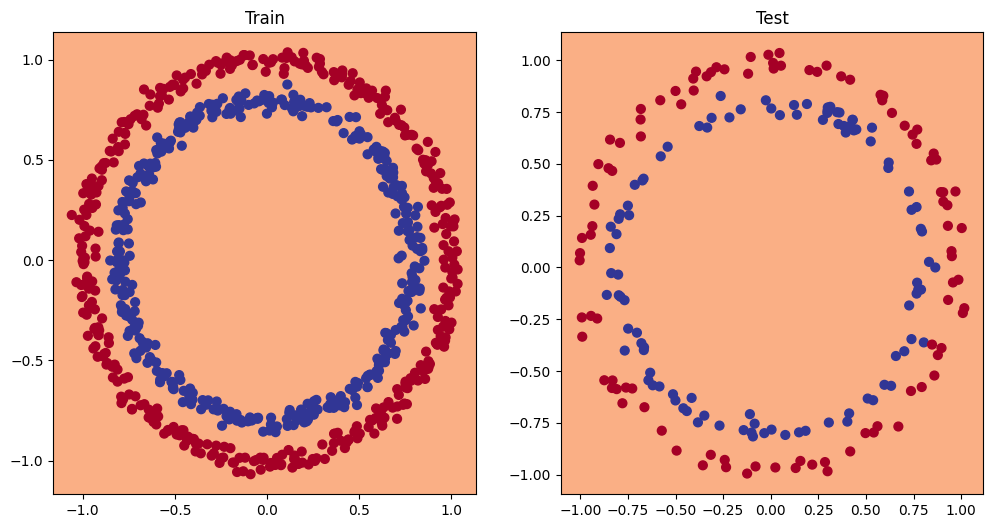

In [163]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2,
                       train_X,
                       train_y)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2,
                       test_X,
                       test_y)

# Multiclass classification Neural Network

define blobs data

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
samples_n = 1000
features_n = 2
classes_n = 4
RANDOM_SEED = 43

In [135]:
X_blob, y_blob = make_blobs(n_samples=samples_n,
           n_features=features_n,
           centers=classes_n,
           cluster_std=1.5,
           random_state=RANDOM_SEED)


In [136]:
X_blob = torch.from_numpy(X_blob).type(torch.float).to(device)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor).to(device)

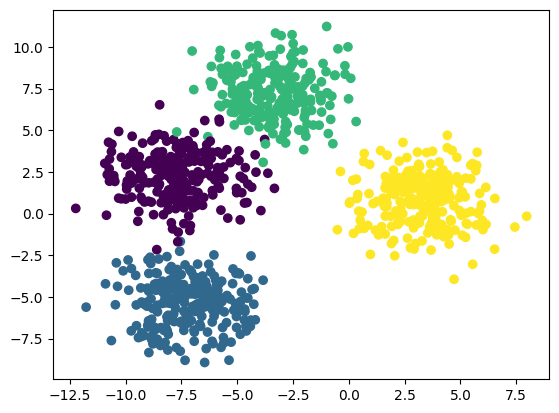

In [137]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob)


In [138]:
# split the model into training and testing sets
training_part = 0.2

train_X_blob, test_X_blob, train_y_blob, test_y_blob = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)


In [139]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [164]:
class BlobClassification_v0(torch.nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.layers = torch.nn.Sequential(
        torch.nn.Linear(in_features=input_features, out_features=hidden_units),
        # torch.nn.ReLU(),
        torch.nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # torch.nn.ReLU(),
        torch.nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  def forward(self, x):
    return self.layers(x)



In [165]:
model_3 = BlobClassification_v0(input_features=2,
                                output_features=4,
                                hidden_units=8).to(device)
model_3

BlobClassification_v0(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

# Set loss functions and optimiser

In [166]:
loss_fn = torch.nn.CrossEntropyLoss()

optimiser = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

# Imitate forward pass
logits -> classes probabilities -> maximum class probability

In [167]:
model_3.eval()
with torch.inference_mode():
  # dim = 1, means accross rows summation equals to 1
  test_blob_logits = model_3(test_X_blob)
  test_blob_preds = torch.softmax(test_blob_logits, dim=1).argmax(dim=1)

test_blob_preds

tensor([2, 2, 3, 1, 3, 3, 3, 3, 2, 3, 3, 1, 2, 2, 3, 3, 3, 1, 2, 2, 3, 2, 3, 3,
        2, 2, 2, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 2, 1,
        2, 2, 2, 3, 1, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 3, 2, 2, 2, 1, 2, 3, 1, 2,
        2, 1, 3, 3, 1, 3, 2, 2, 2, 2, 3, 1, 1, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 3,
        3, 2, 2, 2, 2, 3, 3, 1, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 1, 3, 3,
        2, 2, 3, 1, 2, 2, 3, 1, 3, 3, 2, 1, 2, 3, 1, 1, 1, 3, 1, 2, 3, 3, 2, 1,
        3, 3, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
        3, 3, 3, 3, 2, 3, 2, 2])

In [143]:
test_blob_preds.dtype

torch.int64

In [115]:
test_blob_preds

(tensor([2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2,
         2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
         2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
         2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2,
         2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0,
         2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0,
         2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
         0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
         0, 0, 0, 0, 2, 0, 2, 2]),
 type)

In [145]:
test_blob_preds.dtype, test_y_blob.dtype

(torch.int64, torch.int64)

# Train and test data

In [168]:
epochs_n = 1000
start_epoch_n = 0
finish_epoch_n = start_epoch_n + epochs_n
test_step = int(epochs_n / 10)

In [169]:
for epoch in range(start_epoch_n, finish_epoch_n):
  model_3.train()

  train_blobs_logits = model_3(train_X_blob)

  train_blob_preds = torch.softmax(train_blobs_logits, dim=1).argmax(dim=1)

  train_acc = accuracy(train_y_blob, train_blob_preds)
  train_loss = loss_fn(train_blobs_logits, train_y_blob)

  optimiser.zero_grad()

  train_loss.backward()

  optimiser.step()

  if epoch % test_step == 0:
    model_3.eval()
    with torch.inference_mode():
      test_blob_logits = model_3(test_X_blob)

      test_blob_preds = torch.softmax(test_blob_logits, dim=1).argmax(dim=1)

      test_loss = loss_fn(test_blob_logits, test_y_blob)
      test_acc = accuracy(test_y_blob, test_blob_preds)

      print(f"epoch: {epoch}, test accuracy: {test_acc}%, test loss: {test_loss}")

start_epoch_n = finish_epoch_n
finish_epoch_n += epochs_n


epoch: 0, test accuracy: 83.0%, test loss: 0.9462671875953674
epoch: 100, test accuracy: 100.0%, test loss: 0.025959694758057594
epoch: 200, test accuracy: 100.0%, test loss: 0.016818052157759666
epoch: 300, test accuracy: 100.0%, test loss: 0.013404817320406437
epoch: 400, test accuracy: 100.0%, test loss: 0.01151836197823286
epoch: 500, test accuracy: 100.0%, test loss: 0.010309134609997272
epoch: 600, test accuracy: 100.0%, test loss: 0.009469474665820599
epoch: 700, test accuracy: 100.0%, test loss: 0.00885446835309267
epoch: 800, test accuracy: 100.0%, test loss: 0.008386163972318172
epoch: 900, test accuracy: 100.0%, test loss: 0.008018897846341133


In [150]:
from helper_functions import plot_decision_boundary

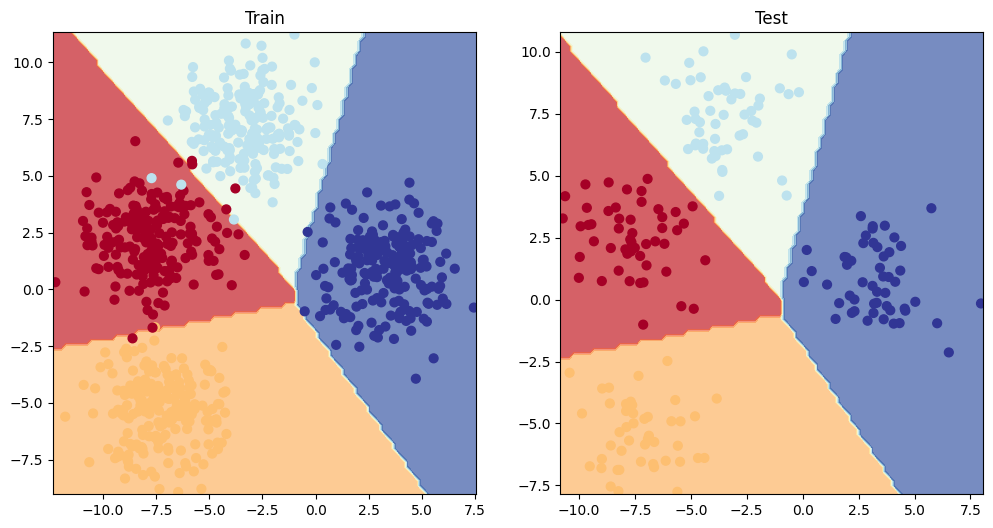

In [170]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, train_X_blob, train_y_blob)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, test_X_blob, test_y_blob)